- downscale the temperatures in the era5 land data for the centroid of the era5land cells
- use DEM (alos globe) and era5 land geopotential
- calculate the elevation difference (delta elevation)
- calculate the delta temperature per cell
- 

In [110]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os


In [2]:
geopotential = xr.open_dataset('/Users/varyabazilova/Desktop/paper2/Thesisfiles_Varya/climate/elevation/geopotential.nc')

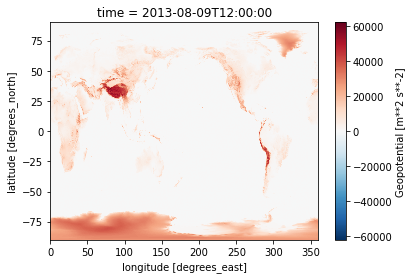

In [3]:
geopotential.z.plot()

In [4]:
langtang_elevation = pd.read_csv('/Users/varyabazilova/Desktop/paper2/Thesisfiles_Varya/climate/elevation/geopotential_langtang.csv')

In [5]:
era5land = xr.open_dataset('/Users/varyabazilova/Desktop/paper2/Thesisfiles_Varya/climate/Era5/langtang/temp/2022.nc')

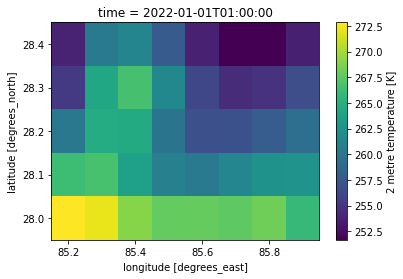

In [6]:
era5land.t2m.isel(time = 1).plot()

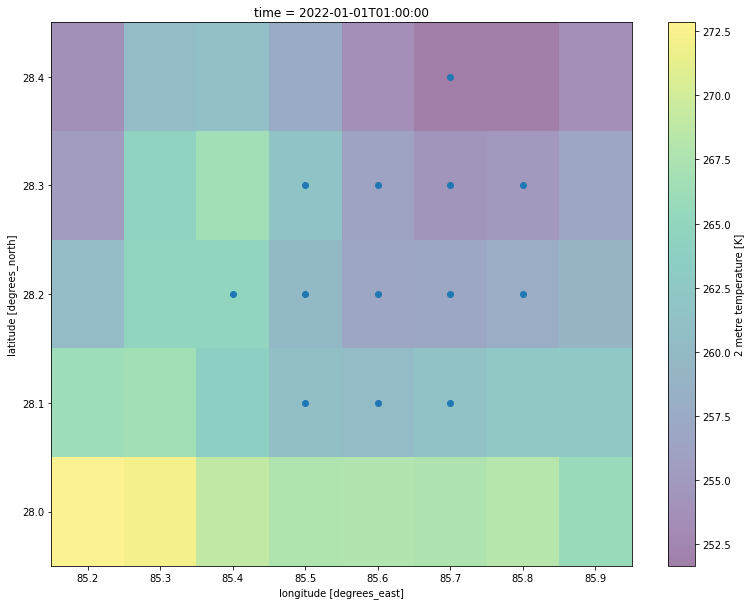

In [7]:
plt.figure(figsize=(13,10))
era5land.t2m.isel(time = 1).plot(alpha = 0.5)
plt.scatter(x = langtang_elevation.Longitude, y = langtang_elevation.Latitude)

In [23]:
# langtang dem - alluvial fans dem part 9
dempath = '/Users/varyabazilova/Desktop/alluvial_fans/dem_all/new_points_catchmetns/all_points/1_dem/'

dem_hma = xr.open_dataset(dempath + 'dem_clip.tif')
# clip using the langtang-ish bbox


min_lon = era5land.longitude.values.min()
min_lat = era5land.latitude.values.min()
max_lon = era5land.longitude.values.max()
max_lat = era5land.latitude.values.max()

dem = dem_hma.rio.clip_box(minx=85, miny=28, maxx=86, maxy=29)


In [19]:
longitudes = langtang_elevation.Longitude
latitudes = langtang_elevation.Latitude

selected = dem.sel(x = longitudes, y = latitudes, method = 'nearest')

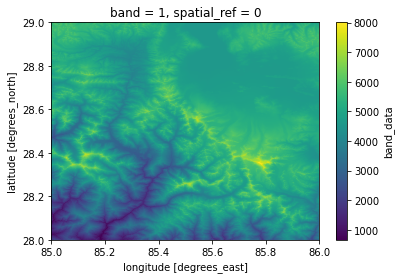

In [24]:
dem.band_data.plot()

In [53]:
df = selected.to_dataframe()
df = df.reset_index()
df = df.drop_duplicates()
df = df.rename(columns = {'x':'Longitude', 'y':'Latitude'})


In [54]:
df

,band,Longitude,Latitude,spatial_ref,band_data
0,1,85.499861,28.099861,0,4744.0
3,1,85.499861,28.200139,0,4279.0
8,1,85.499861,28.299861,0,3884.0
12,1,85.499861,28.399861,0,5392.0
13,1,85.599861,28.099861,0,3952.0
16,1,85.599861,28.200139,0,4246.0
21,1,85.599861,28.299861,0,5817.0
25,1,85.599861,28.399861,0,5217.0
26,1,85.699861,28.099861,0,4367.0
29,1,85.699861,28.200139,0,4943.0


(85.2, 86.0)

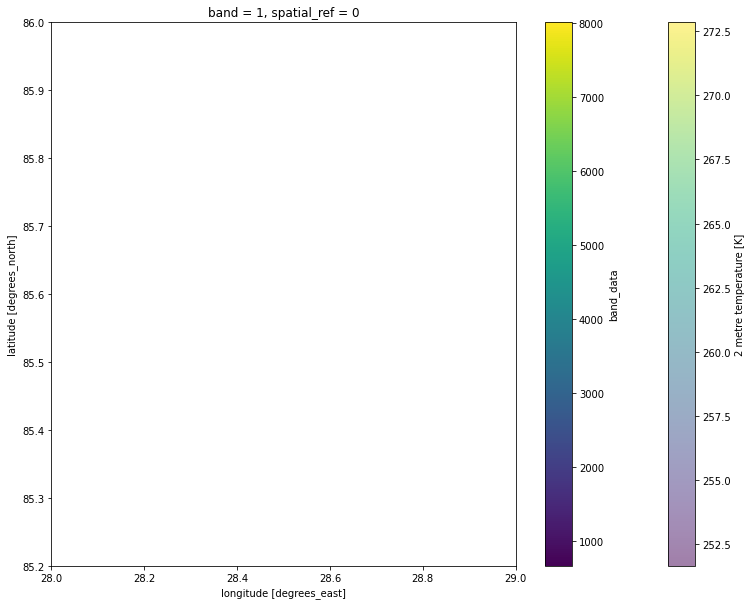

In [151]:
plt.figure(figsize=(13,10))
era5land.t2m.isel(time = 1).plot(alpha = 0.5)
# plt.scatter(x = df.x, y = df.y, c = df.band_data, cmap = 'magma', marker = 'x')
plt.scatter(x = langtang_elevation.Longitude, y = langtang_elevation.Latitude)
dem.band_data.plot()
plt.xlim(28, 29)
plt.ylim(85.2, 86)
# plt.colorbar()

In [88]:
langtang_elevation = langtang_elevation.round(3)
df = df.round(3)

In [92]:
merged = langtang_elevation.merge(df, on = ['Longitude', 'Latitude'])

In [100]:

# z - geopotential 
# band_data = dem data 
# delts H = difference between geopotential and DEM info
merged['delta_H'] = merged.z - merged.band_data 

In [106]:
merged['delta_t'] = merged.delta_H * 6.5/1000

In [143]:
merged



,cellnr,Latitude,Longitude,z,band,spatial_ref,band_data,delta_H,delta_t
0,12,28.1,85.5,4006.004,1,0,4744.0,-737.996,-4.796974
1,13,28.1,85.6,4116.322,1,0,3952.0,164.322,1.068093
2,14,28.1,85.7,4106.181,1,0,4367.0,-260.819,-1.695324
3,19,28.2,85.4,3513.108,1,0,3660.0,-146.892,-0.954798
4,20,28.2,85.5,4432.013,1,0,4279.0,153.013,0.994584
5,21,28.2,85.6,5007.776,1,0,4246.0,761.776,4.951544
6,22,28.2,85.7,5149.130,1,0,4943.0,206.130,1.339845
7,23,28.2,85.8,5078.555,1,0,6414.0,-1335.445,-8.680392
8,28,28.3,85.5,4167.127,1,0,3884.0,283.127,1.840326
9,29,28.3,85.6,5154.559,1,0,5817.0,-662.441,-4.305866


In [118]:
# final table with cell number and delta temperature 

df = merged[['cellnr', 'delta_t']]
df

,cellnr,delta_t
0,12,-4.796974
1,13,1.068093
2,14,-1.695324
3,19,-0.954798
4,20,0.994584
5,21,4.951544
6,22,1.339845
7,23,-8.680392
8,28,1.840326
9,29,-4.305866


## try to downscale the temperatures 

In [134]:
import pandas as pd
import os

# Specify the path to the folder containing climate files
climate_folder = '/Users/varyabazilova/Desktop/paper2/downscaling_simple/langtang'

# Step 1: Read the table data into a DataFrame
table_df = df
# Step 2: Iterate over each row in the DataFrame
for index, row in table_df.iterrows():
    cellnr = int(row['cellnr'])
    delta_t = row['delta_t']


    
    # Step 3: Read and update the corresponding file
    file_path = os.path.join(climate_folder, f'climatecell.{cellnr}.met')
    if os.path.exists(file_path):
        # Read the file into a DataFrame
        file_df = pd.read_csv(file_path)
        
        # Update Ta values
        file_df['Ta'] = file_df['Ta'] + delta_t
        
        # Save the updated DataFrame back to the file
        file_df.to_csv(file_path, index=False)
        print(f'Ta values updated for {file_path}')
    else:
        print(f'File {file_path} not found.')

print('All updates complete.')


12
Ta values updated for /Users/varyabazilova/Desktop/paper2/downscaling_simple/langtang/climatecell.12.met
13
Ta values updated for /Users/varyabazilova/Desktop/paper2/downscaling_simple/langtang/climatecell.13.met
14
Ta values updated for /Users/varyabazilova/Desktop/paper2/downscaling_simple/langtang/climatecell.14.met
19
Ta values updated for /Users/varyabazilova/Desktop/paper2/downscaling_simple/langtang/climatecell.19.met
20
Ta values updated for /Users/varyabazilova/Desktop/paper2/downscaling_simple/langtang/climatecell.20.met
21
Ta values updated for /Users/varyabazilova/Desktop/paper2/downscaling_simple/langtang/climatecell.21.met
22
Ta values updated for /Users/varyabazilova/Desktop/paper2/downscaling_simple/langtang/climatecell.22.met
23
Ta values updated for /Users/varyabazilova/Desktop/paper2/downscaling_simple/langtang/climatecell.23.met
28
Ta values updated for /Users/varyabazilova/Desktop/paper2/downscaling_simple/langtang/climatecell.28.met
29
Ta values updated for /Us

In [136]:
test = pd.read_csv('/Users/varyabazilova/Desktop/paper2/downscaling_simple/langtang/climatecell.12.met')
testLeon = pd.read_csv('/Users/varyabazilova/Desktop/paper2/Thesisfiles_Varya/climate/finalclimatefiles/langtang/climatecell.12.met')

<AxesSubplot:>

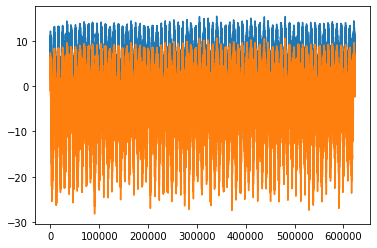

In [141]:
testLeon.Ta.plot()
test.Ta.plot()

In [142]:
# test

,D,Pr,Ta,Rsw,N
0,1951-09-01 00:00:00,0.236857,1.347926,3038.967222,0.897676
1,1951-09-01 01:00:00,0.394758,1.921796,46.805278,0.888749
2,1951-09-01 02:00:00,0.244752,2.525326,207.160278,0.711036
3,1951-09-01 03:00:00,0.189483,3.307666,487.710833,0.480158
4,1951-09-01 04:00:00,0.361204,3.998426,886.618611,0.580429
...,...,...,...,...,...
623107,2022-09-30 19:00:00,0.003714,-0.336654,5485.033333,0.160714
623108,2022-09-30 20:00:00,0.001237,-0.495004,5485.033333,0.126288
623109,2022-09-30 21:00:00,0.000000,-0.740644,5485.033333,0.100179
623110,2022-09-30 22:00:00,0.001237,-1.003244,5485.033333,0.164682
